<a href="https://colab.research.google.com/github/babaroscopy/colab/blob/main/Recognizing_AI_vs_Original_Ads_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Extract the zip file into a specific directory
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        # Unzip the file to a desired folder in Colab (e.g., '/content/images')
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/images')  # You can change the path if needed

# List the contents of the extracted directory to verify everything was unzipped
os.listdir('/content/images')


Saving DataAIvsOriginal.zip to DataAIvsOriginal.zip


['DataAIvsOriginal']

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 441 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.5899 - loss: 1.3714 - val_accuracy: 0.9125 - val_loss: 0.3160
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8125 - loss: 0.9877
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.8732 - loss: 0.3374 - val_accuracy: 0.8750 - val_loss: 0.2935
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - accuracy: 0.8125 - loss: 0.3387
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.8936 - loss: 0.3458 - val_accuracy: 0.9125 - val_loss: 0.4220
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.7500 - loss: 0.3142
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9309 - loss: 0.1793 - val_accuracy: 0.9500 - val_loss: 0.1913
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - accuracy: 0.9375 - loss: 0.1953
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9616 - loss: 0.1568 - val_accuracy: 0.9375 - val_loss: 0.3984
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 686us/step - accuracy: 1.0000 - loss: 0.0224
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9139 - loss: 0.2978 - val_accuracy: 0.9375 - val_loss: 0.1345
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━

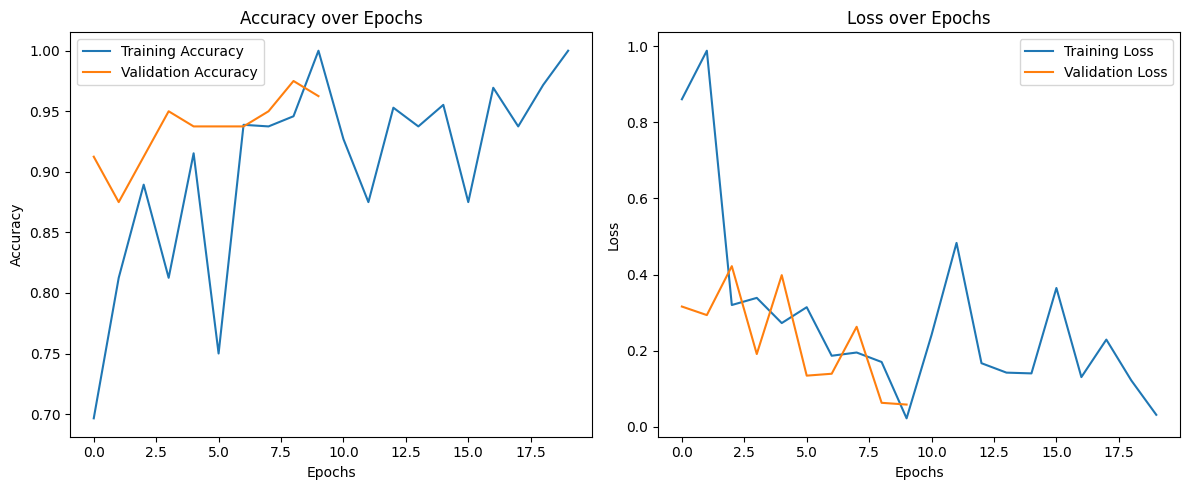

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step


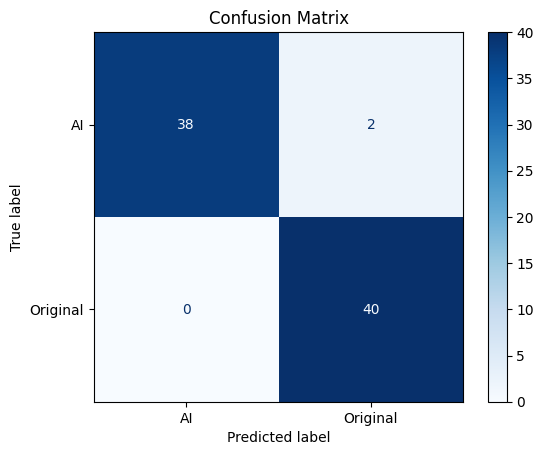

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data directory paths
train_dir = '/content/images/DataAIvsOriginal/train'
validation_dir = '/content/images/DataAIvsOriginal/Validate'
test_dir = '/content/images/DataAIvsOriginal/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training history
def plot_training_history(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss graphs
plot_training_history(history)

# Confusion matrix
def plot_confusion_matrix(model, test_generator):
    # Predict on test data
    predictions = (model.predict(test_generator) > 0.5).astype(int)
    y_true = test_generator.classes

    # Generate confusion matrix
    cm = confusion_matrix(y_true, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())

    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Call the function to plot confusion matrix
plot_confusion_matrix(model, test_generator)


In [9]:
# Predict on a new image
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(image_path, model):
    img = load_img(image_path, target_size=(256, 256))  # Load image
    img_array = img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch
    img_array /= 255.0  # Normalize

    # Predict Probability
    probability = model.predict(img_array)[0][0]

    # Predict and interpret results
    label = "Original" if probability > 0.5 else "AI-Generated"
    confidence = probability if probability > 0.5 else 1 - probability


    return label, confidence

In [7]:
# Example usage
image_path = '/content/images/DataAIvsOriginal/test/Original/5.png'
label, confidence = predict_image(image_path, model)
print(f"Prediction: {label} with confidence {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: Original with confidence 1.00


In [6]:
# Example usage
image_path = '/content/images/DataAIvsOriginal/test/AI/image_5.png'
label, confidence = predict_image(image_path, model)
print(f"Prediction: {label} with confidence {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Prediction: AI-Generated with confidence 1.00


**Using SVM**

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 441 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
Validation Accuracy (SVM): 0.91
Test Accuracy (SVM): 0.94


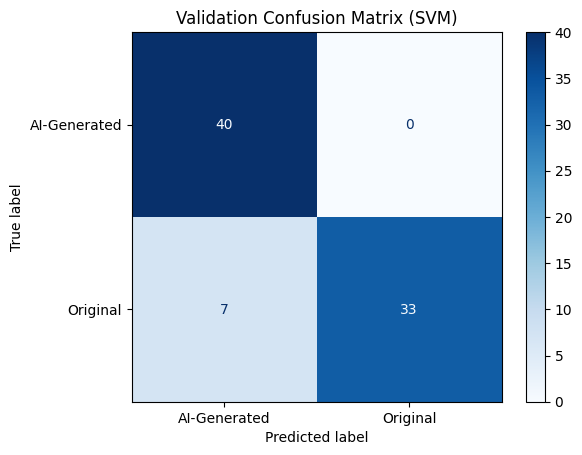

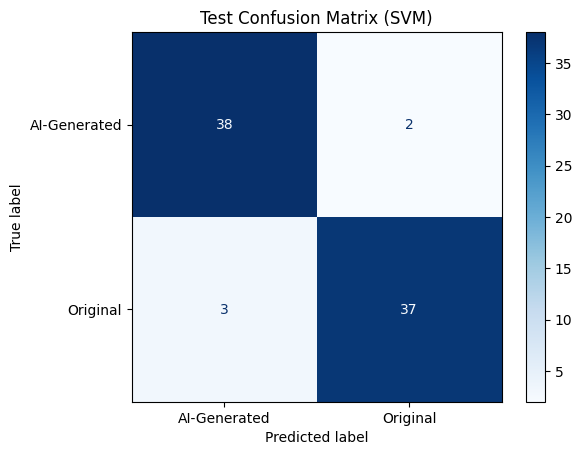

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load a pretrained model for feature extraction
feature_extractor = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(256, 256, 3))

# Freeze layers to avoid updating them
feature_extractor.trainable = False

# Data Preprocessing
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16

# Load Data
train_dir = '/content/images/DataAIvsOriginal/train'
validation_dir = '/content/images/DataAIvsOriginal/Validate'
test_dir = '/content/images/DataAIvsOriginal/test'

train_generator = datagen.flow_from_directory(
    train_dir, target_size=(256, 256), batch_size=batch_size, class_mode='binary', shuffle=False
)
validation_generator = datagen.flow_from_directory(
    validation_dir, target_size=(256, 256), batch_size=batch_size, class_mode='binary', shuffle=False
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=(256, 256), batch_size=batch_size, class_mode='binary', shuffle=False
)

# Feature Extraction
def extract_features(generator):
    num_samples = generator.samples
    features = feature_extractor.predict(generator, steps=num_samples // generator.batch_size + 1, verbose=1)
    labels = generator.classes
    return features, labels

# Extract features for all datasets
train_features, train_labels = extract_features(train_generator)
val_features, val_labels = extract_features(validation_generator)
test_features, test_labels = extract_features(test_generator)

# Flatten the feature vectors for SVM input
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Train an SVM classifier
svm = SVC(kernel='rbf', probability=True)
svm.fit(train_features, train_labels)

# Evaluate the SVM
val_predictions = svm.predict(val_features)
test_predictions = svm.predict(test_features)

val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print(f"Validation Accuracy (SVM): {val_accuracy:.2f}")
print(f"Test Accuracy (SVM): {test_accuracy:.2f}")

# Plot Confusion Matrix
def plot_confusion_matrix_svm(labels, predictions, title):
    cm = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AI-Generated', 'Original'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

plot_confusion_matrix_svm(val_labels, val_predictions, "Validation Confusion Matrix (SVM)")
plot_confusion_matrix_svm(test_labels, test_predictions, "Test Confusion Matrix (SVM)")
